### <div class="alert alert-block alert-success">Homework 2 --- Group 5: Betty Chen， Chenyi Zhang, Ruiyuan Luan, Shuang Peng</div>

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format',lambda x: '%.2f'%x)

<div class="alert alert-block alert-success"> Part I</div>

In [49]:
housing = pd.read_csv('home_data.csv',index_col = 0)

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [51]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Add extra features:

In [52]:
housing['bedrooms_squared']=housing.bedrooms*housing.bedrooms
housing['bed_bath_rooms'] = housing.bedrooms*housing.bathrooms
housing['log_sqft_living'] = np.log10(housing.sqft_living)
housing['lat_plus_long'] = housing.lat+housing.long

In [53]:
housing.describe()[1:2][['bedrooms_squared','bed_bath_rooms','log_sqft_living','lat_plus_long']]

,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
mean,12.23,7.50,3.28,-74.65


#### <font color=blue>The mean values of four new variables are 12.23, 7.50, 3.28, -74.65.

### Model 1:

#### 1. Train-Test-Split

In [54]:
X= housing[['sqft_living', 'bedrooms','bathrooms','lat', 'long']]

In [55]:
y=housing.price

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### 2. Estimate the regression coefficients

In [57]:
linreg = LinearRegression().fit(X_train, y_train)

In [58]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [ 3.12942011e+02 -5.30962684e+04  1.47770422e+04  6.53983345e+05
 -3.25707345e+05]
linear model intercept (b): -70870847.444
R-squared score: 0.590


#### 3. RSS on trainning set

In [59]:
Price_train_1 = (linreg.coef_ * X_train).sum(axis=1) + linreg.intercept_

In [60]:
((Price_train_1 - y_train)**2).sum()

979843599527788.9

#### 4. RSS on test set

In [61]:
Price_test_1 = linreg.predict(X_test)

In [62]:
((Price_test_1 - y_test)**2).sum()

213487129853769.4

### Model 2:

#### 1. Train-Test-Split

In [63]:
X= housing[['sqft_living', 'bedrooms','bathrooms','lat', 'long','bed_bath_rooms']]

In [64]:
y=housing.price

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### 2. Estimate the regression coefficients

In [66]:
linreg = LinearRegression().fit(X_train, y_train)

In [67]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [ 3.06819574e+02 -1.04604713e+05 -7.01815223e+04  6.50590954e+05
 -3.09965761e+05  2.49441476e+04]
linear model intercept (b): -68606821.793
R-squared score: 0.594


#### 3. RSS on trainning set

In [68]:
Price_train_2 = (linreg.coef_ * X_train).sum(axis=1) + linreg.intercept_

In [69]:
((Price_train_2 - y_train)**2).sum()

970799203211189.2

#### 4. RSS on test set

In [70]:
Price_test_2 = linreg.predict(X_test)

In [71]:
((Price_test_2 - y_test)**2).sum()

210778545075244.1

### Model 3:

#### 1. Train-Test-Split

In [72]:
X= housing[['sqft_living', 'bedrooms','bathrooms','lat', 'long',\
            'bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']]

In [73]:
y=housing.price

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### 2. Estimate the regression coefficients

In [75]:
linreg = LinearRegression().fit(X_train, y_train)

In [76]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [ 5.37808087e+02  2.78048472e+03  1.01363772e+05  5.30798411e+05
 -4.09655443e+05 -1.81822573e+04  7.24579880e+02 -1.31484522e+06
  1.21142968e+05]
linear model intercept (b): -62628451.678
R-squared score: 0.616


#### 3. RSS on trainning set

In [77]:
Price_train_3 = (linreg.coef_ * X_train).sum(axis=1) + linreg.intercept_

In [78]:
((Price_train_3 - y_train)**2).sum()

913653648613737.6

#### 4. RSS on test set

In [79]:
Price_test_3 = linreg.predict(X_test)

In [80]:
((Price_test_3 - y_test)**2).sum()

203972055451345.8

#### <font color=blue>1. The sign for the coefficient for ‘bathrooms’ in Model 1 is positive.
#### <font color=blue>2. The sign for the coefficient for ‘bathrooms’ in Model 2 is negative.
#### <font color=blue>3. The signs of bathrooms in two models are not the same, because after we add bed_bath_rooms into model 3,it will change the fit of the model, as a result, the coefficients of the model will change.
#### <font color=blue>4. Model 3's RSS on trainning data is the lowest.
#### <font color=blue>5. Model 3's RSS on testing data is the lowest.

### Train-Validate-Test

In [81]:
X=housing[['sqft_living']]

In [82]:
y=housing.price

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state=0)

In [84]:
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 

pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),LinearRegression()) 
param_grid = {'polynomialfeatures__degree': range(1,16)} 

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': range(1, 16)},
             return_train_score=True)

In [85]:
df_grid = pd.DataFrame(grid.cv_results_) 
df_grid                               

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.01,0.01,0.00,1,{'polynomialfeatures__degree': 1},0.49,0.51,0.48,0.50,0.48,0.49,0.01,6,0.50,0.49,0.50,0.49,0.50,0.49,0.00
1,0.02,0.00,0.00,0.00,2,{'polynomialfeatures__degree': 2},0.54,0.59,0.42,0.54,0.52,0.52,0.05,1,0.53,0.52,0.55,0.53,0.54,0.54,0.01
2,0.02,0.00,0.00,0.00,3,{'polynomialfeatures__degree': 3},0.54,0.57,0.42,0.55,0.52,0.52,0.05,3,0.54,0.53,0.55,0.54,0.55,0.54,0.01
3,0.02,0.00,0.00,0.00,4,{'polynomialfeatures__degree': 4},0.54,0.57,0.33,0.54,0.52,0.50,0.09,5,0.55,0.53,0.56,0.54,0.55,0.55,0.01
4,0.02,0.00,0.00,0.00,5,{'polynomialfeatures__degree': 5},0.55,0.59,0.33,0.54,0.52,0.50,0.09,4,0.55,0.54,0.56,0.55,0.55,0.55,0.01
5,0.03,0.01,0.00,0.00,6,{'polynomialfeatures__degree': 6},0.55,0.60,0.39,0.54,0.52,0.52,0.07,2,0.55,0.54,0.56,0.56,0.56,0.55,0.01
6,0.04,0.02,0.01,0.01,7,{'polynomialfeatures__degree': 7},0.55,0.60,-1.50,0.54,0.52,0.14,0.82,8,0.55,0.54,0.56,0.56,0.56,0.56,0.01
7,0.03,0.01,0.02,0.02,8,{'polynomialfeatures__degree': 8},0.56,0.60,-2.98,0.54,0.52,-0.15,1.41,9,0.55,0.54,0.56,0.56,0.56,0.56,0.01
8,0.03,0.00,0.01,0.00,9,{'polynomialfeatures__degree': 9},0.56,0.61,0.09,0.54,0.52,0.46,0.19,7,0.55,0.54,0.56,0.56,0.56,0.56,0.01
9,0.03,0.01,0.01,0.00,10,{'polynomialfeatures__degree': 10},0.56,-5.92,-29.59,0.54,0.52,-6.78,11.68,10,0.56,0.54,0.56,0.56,0.56,0.56,0.01


In [86]:
print("Score with poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score with poly features: 0.51


#### <font color=blue> Polynomial with degree of 2 is the best model and its performance on the test set is 0.51.

<div class="alert alert-block alert-success"> Part II</div>

### 1. Load the breast cancer dataset.

In [87]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [88]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [89]:
print("Keys of load_breast_cancer:\n", data.keys())

Keys of load_breast_cancer:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [90]:
print("Target names:", data['target_names'])

Target names: ['malignant' 'benign']


### 2. Split the data set

In [91]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    data['data'], data['target'], test_size=0.1 ,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state = 0)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

val_scores = []
neighbors = np.arange(1,10,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print(f"best validation score: {np.max(val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")



best validation score: 0.951
best n_neighbors: 7
test-set score: 0.912


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':  np.arange(1, 20, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5,
                   return_train_score=True)
grid.fit(X_trainval, y_trainval)
print(f"best parameters: {grid.best_params_}")

print(f"test-set score: {grid.score(X_test, y_test):.3f}")



best parameters: {'n_neighbors': 9}
test-set score: 0.947


<ipython-input-94-4d1b7e0c858b>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_neighbors.astype(np.int),
<ipython-input-94-4d1b7e0c858b>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

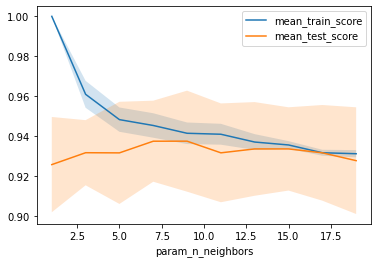

In [94]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
#shadow is the standard deviation of the performance.